Mean squared error: 63494.554033551925
Root mean squared error: 251.98125730607808
Mean absolute error: 27.22337704918033
R2 score: 0.8304907636193852


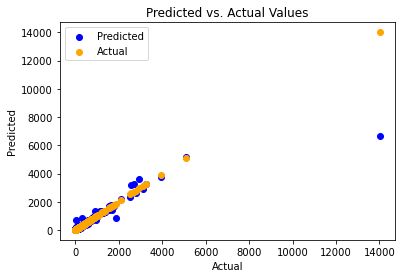

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data from CSV file
data = pd.read_csv("/Users/alyssajames/BMEN415/Regression Models/cancer_reg_updated.csv")

# Fill missing values with the mean of the respective column
data = data.fillna(data.mean())

# Separate features and target variable
X = data.drop(['avgDeathsPerYear'], axis=1)
y = data['avgDeathsPerYear']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create decision tree regressor
base_estimator = DecisionTreeRegressor(random_state=1)

# Create a bagged regression tree using the decision tree regressor
bagging_reg = BaggingRegressor(estimator=base_estimator, n_estimators=100, random_state=1)

# Fit the bagged regressor to the training data
bagging_reg.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = bagging_reg.predict(X_test)

# Print the mean squared error, root mean squared error, mean absolute error, and R2 score of the regressor
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

# Scatterplot for the predicted vs. actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()
